In [59]:
import torch
import numpy as np
import pytorch_lightning as pl
from omegaconf import OmegaConf
from hydra import initialize, compose
from hydra.utils import instantiate
from pathlib import Path

import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '../../')

import src

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [71]:
with initialize(config_path='../../conf'):
    cfg = compose(config_name='config', overrides=['data_dir=/mnt/efs/home/xhf0560/test_notebooks/protein_dcgan/data/'])

In [65]:
cfg

{'work_dir': '${hydra:runtime.cwd}', 'data_dir': '../../data/training_30_64.hdf5', 'model': {'_target_': 'src.lit_models.DCGAN', 'frag_size': 64, 'z_dim': 100, 'lr': 0.0001, 'beta1': 0.5, 'beta2': 0.999}, 'data': {'_target_': 'torch.utils.data.DataLoader', 'dataset': {'_target_': 'src.datasets.Distograms', 'path': '${data_dir}/training_30_${model.frag_size}.hdf5', 'xmax': 100}, 'batch_size': 128, 'shuffle': True, 'num_workers': 4, 'pin_memory': True}, 'trainer': {'epochs': 30}}

In [9]:
#model = instantiate(cfg.model)

In [140]:
chk_path = Path('../../outputs/2022-06-03/22-17-23/lightning_logs/version_0/checkpoints/epoch=99-step=37599.ckpt')
model = src.lit_models.DCGAN.load_from_checkpoint(chk_path)

In [141]:
@torch.no_grad()
def plot_gen(n_samples: int, 
             model: src.lit_models.DCGAN, 
             z_dim: int = 100, 
             upsample: int = 100
            ) -> None:
    
    model.eval()
    
    samples = torch.randn(n_samples, z_dim, 1, 1)
    fake = model(samples) * upsample
    fake = torch.round(fake, decimals=1)
    
    for i in range(n_samples):
        sample = fake[i].squeeze(0).numpy()
        plt.imshow(sample)
        print(sample)
        plt.show()
        plt.hist(sample.ravel())
        plt.show()

[[ 0.   3.9  6.4 ...  7.3  8.9 10.4]
 [ 3.9  0.   4.1 ...  8.1 10.6 11.4]
 [ 6.4  4.1  0.  ... 12.4 13.5 13.4]
 ...
 [ 7.3  8.1 12.4 ...  0.   4.2  5.9]
 [ 8.9 10.6 13.5 ...  4.2  0.   4.7]
 [10.4 11.4 13.4 ...  5.9  4.7  0. ]]


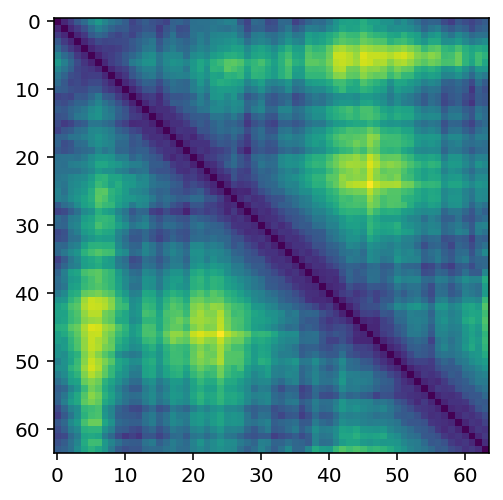

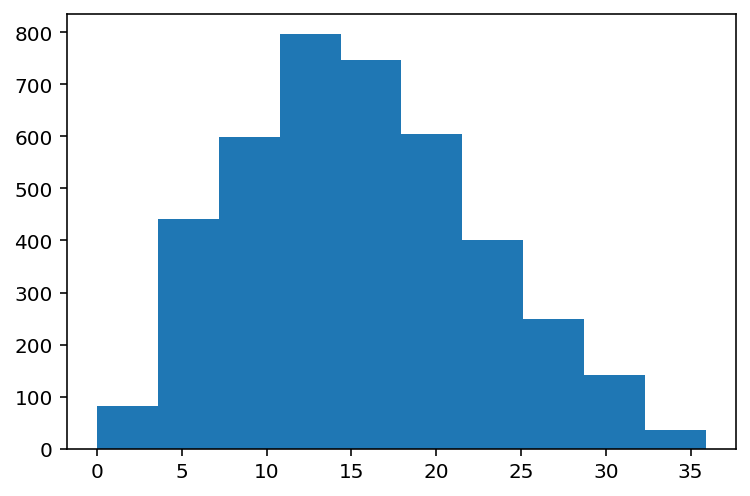

[[ 0.   1.4  3.4 ... 46.7 47.  45.3]
 [ 1.4  0.   0.6 ... 48.9 49.6 48.5]
 [ 3.4  0.6  0.  ... 51.1 50.7 50.5]
 ...
 [46.7 48.9 51.1 ...  0.   3.9  7.1]
 [47.  49.6 50.7 ...  3.9  0.   4.5]
 [45.3 48.5 50.5 ...  7.1  4.5  0. ]]


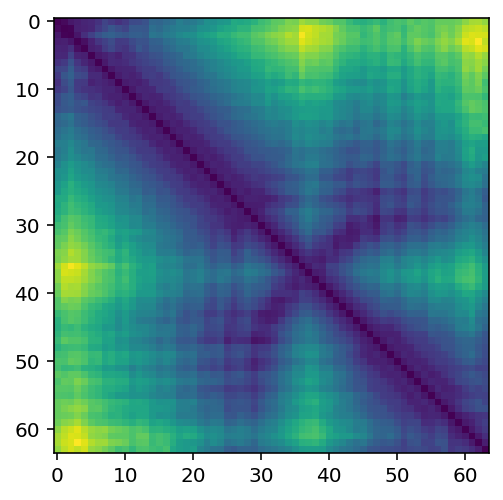

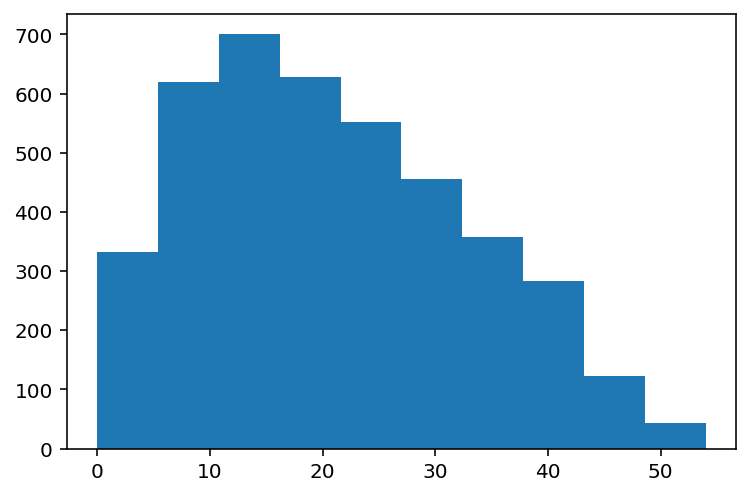

[[ 0.   3.2  6.3 ... 37.8 40.4 39.6]
 [ 3.2  0.   4.  ... 33.9 38.4 37.6]
 [ 6.3  4.   0.  ... 29.7 33.8 33. ]
 ...
 [37.8 33.9 29.7 ...  0.   4.4  5.6]
 [40.4 38.4 33.8 ...  4.4  0.   4. ]
 [39.6 37.6 33.  ...  5.6  4.   0. ]]


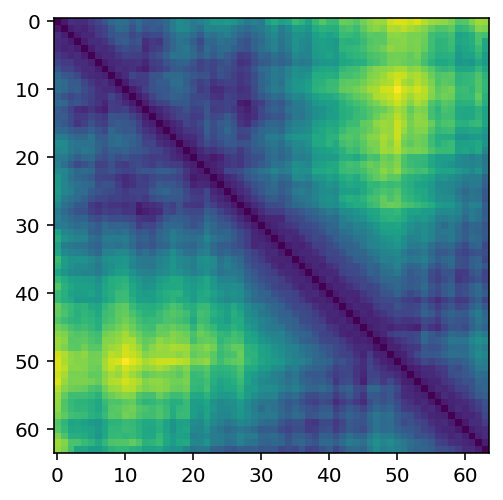

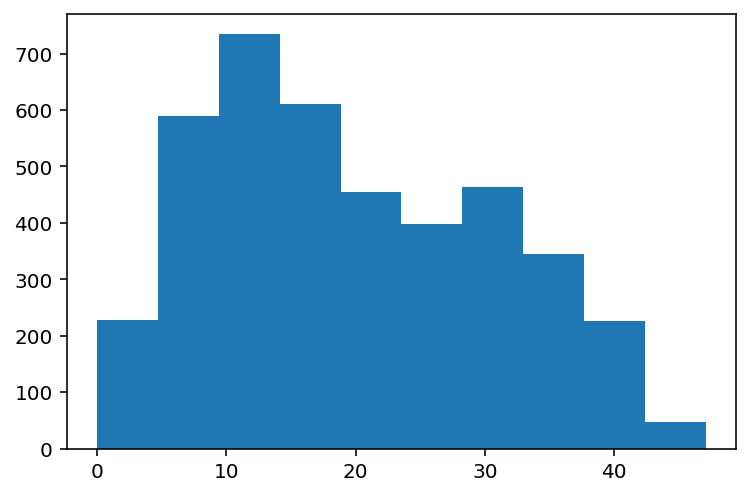

In [149]:
fake = plot_gen(3, model)

In [72]:
loader = instantiate(cfg.data)

In [101]:
def plot_loader(n_samples: int, 
                loader: torch.utils.data.dataloader.DataLoader, 
                upsample: int = 100) -> None:
    
    batch = next(iter(loader))
    
    for i in range(n_samples):
        sample = batch[i].squeeze(0).numpy() * upsample
        print(sample)
        plt.imshow(sample)
        plt.show()
        plt.hist(sample.ravel())
        plt.show()

[[ 0.         0.         0.        ... 17.3       13.799999  12.8      ]
 [ 0.         0.         0.        ... 17.3       13.799999  12.8      ]
 [ 0.         0.         0.        ... 17.3       13.799999  12.8      ]
 ...
 [17.3       17.3       17.3       ...  0.         3.8        6.7000003]
 [13.799999  13.799999  13.799999  ...  3.8        0.         3.8      ]
 [12.8       12.8       12.8       ...  6.7000003  3.8        0.       ]]


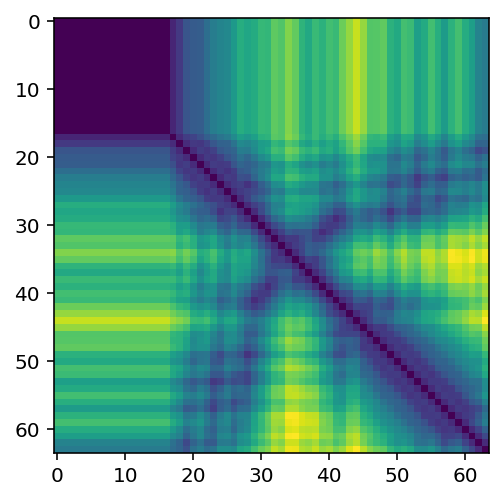

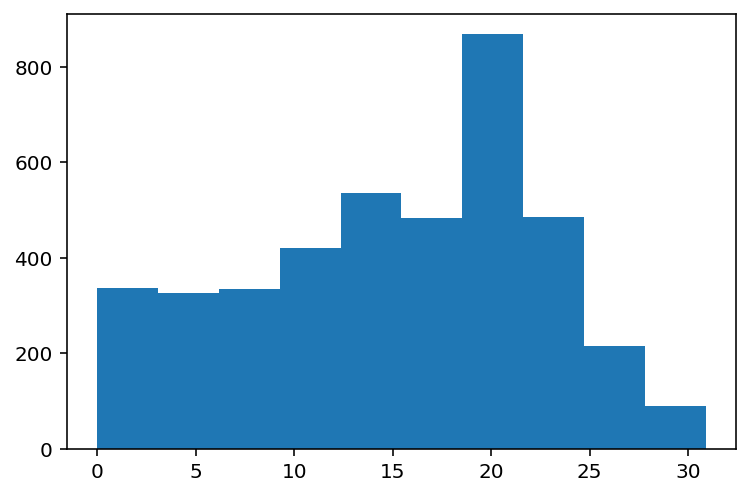

[[ 0.   3.8  5.6 ... 43.1 43.3 46.9]
 [ 3.8  0.   3.8 ... 43.7 44.2 47.8]
 [ 5.6  3.8  0.  ... 47.4 47.8 51.4]
 ...
 [43.1 43.7 47.4 ...  0.   3.8  5.6]
 [43.3 44.2 47.8 ...  3.8  0.   3.8]
 [46.9 47.8 51.4 ...  5.6  3.8  0. ]]


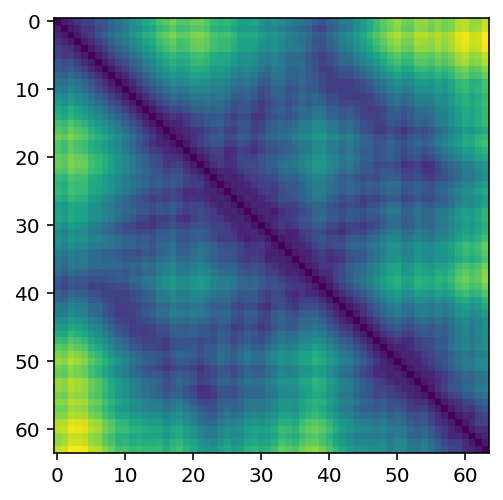

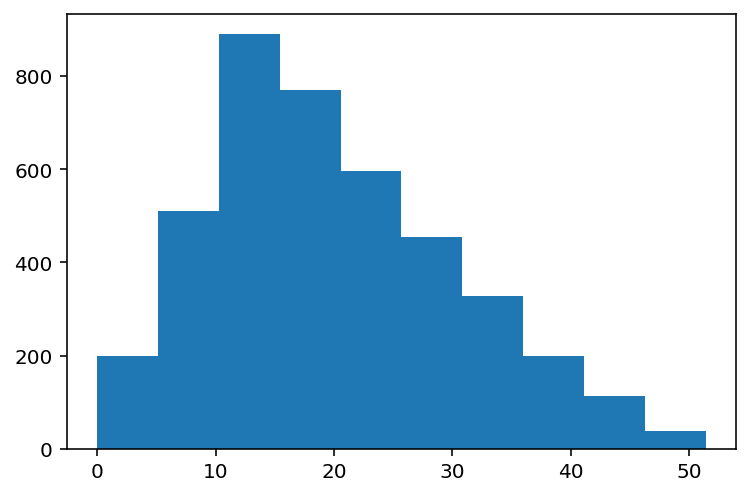

[[ 0.   3.9  6.6 ... 37.3 37.8 40.2]
 [ 3.9  0.   3.8 ... 35.2 36.  38.4]
 [ 6.6  3.8  0.  ... 31.3 32.1 34.6]
 ...
 [37.3 35.2 31.3 ...  0.   3.9  6.3]
 [37.8 36.  32.1 ...  3.9  0.   3.8]
 [40.2 38.4 34.6 ...  6.3  3.8  0. ]]


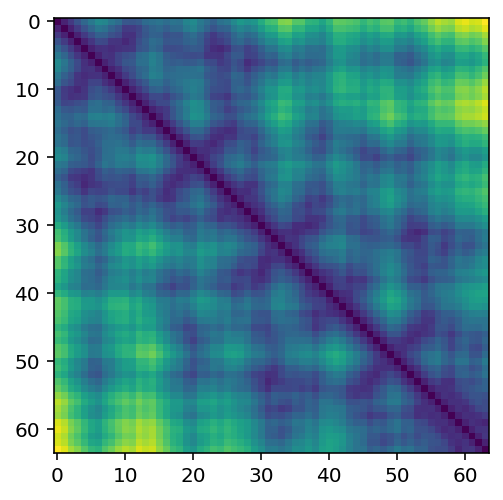

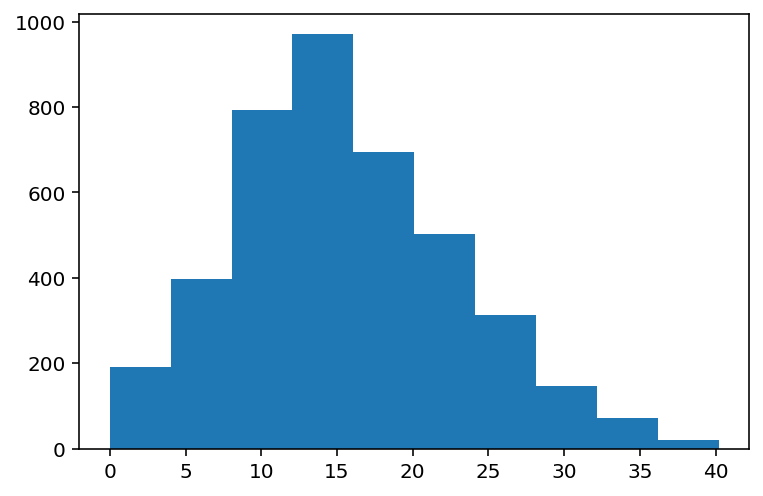

In [109]:
plot_loader(3, loader)